# Graph Exercises
**Author:** Elisa Warner  
**Date:** 07/27/2020

In [2]:
import numpy.random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Create a Dataset

In [8]:
# Create a dataset
df = pd.DataFrame()

# Add a normalized distribution
mu, sigma = 40, 5.2 # mean and standard deviation
df['Age'] = np.random.normal(mu, sigma, 10000)

# Add a bimodal distribution
mu2, sigma2 = 80, 4.1
mu3, sigma3 = 90, 3
grades = list(np.random.normal(mu2,sigma2,5000)) + list(np.random.normal(mu3,sigma3,5000))
df['Grades'] = grades

# Add Discrete Grades
grade_letters = []
for grade_no in grades:
    if grade_no >= 90:
        grade_letters.append('A')
    elif grade_no >= 80:
        grade_letters.append('B')
    elif grade_no >= 70:
        grade_letters.append('C')
    elif grade_no >= 60:
        grade_letters.append('D')
    else:
        grade_letters.append('F')

# Add teacher
teacher = ['Smith', 'Jones', 'Williams']
df['Teacher'] = list(np.random.choice(teacher,10000))

        
df['Grade_Letters'] = grade_letters

In [10]:
df.head()

,Age,Grades,Teacher,Grade_Letters
0,31.485876,80.970264,Jones,B
1,51.149608,74.378738,Smith,C
2,46.886789,79.553351,Williams,C
3,45.404474,79.625476,Williams,C
4,44.526109,79.223755,Williams,C


**Add a second dataset**

In [12]:
# download new dataset
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
print(tips.shape)

(244, 7)


## Histograms and Density Plots

**Plot Ages**

In [16]:
df["Age"].values

array([31.48587569, 51.14960815, 46.88678908, ..., 45.86413323,
       36.70725961, 35.51138105])

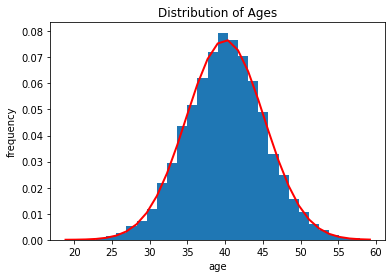

In [17]:
# matplotlib

count, bins, ignored = plt.hist(df['Age'].values, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title('Distribution of Ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

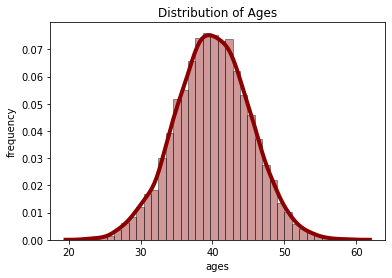

In [7]:
# seaborn

# Density Plot and Histogram of all arrival delays
sns.distplot(df['Age'].values, hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Distribution of Ages')
plt.xlabel('ages')
plt.ylabel('frequency')
plt.show()

**Plot Grades**

**ASSIGNMENT: Plot the distribution of grades**

matplotlib

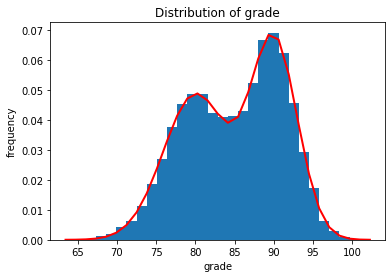

In [23]:
# matplotlib
count, bins, ignored = plt.hist(df['Grades'].values, 30, density=True)
plt.plot(bins, (1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ) + 1/(sigma3 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu3)**2 / (2 * sigma3**2) ))/2, linewidth=2, color='r')
plt.title('Distribution of grade')
plt.xlabel('grade')
plt.ylabel('frequency')
plt.show()


seaborn

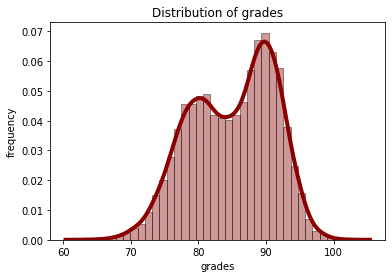

In [25]:
# seaborn
# seaborn

# Density Plot and Histogram of all arrival delays
sns.distplot(df['Grades'].values, hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Distribution of grades')
plt.xlabel('grades')
plt.ylabel('frequency')
plt.show()

## Bar Plots

More examples here: https://benalexkeen.com/bar-charts-in-matplotlib/

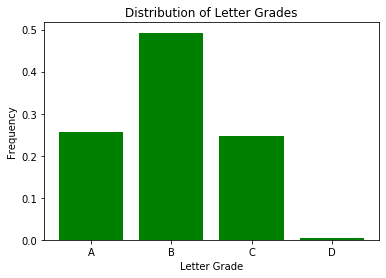

In [26]:
# matplotlib
# First, count how many of each
x = np.sort(pd.unique(df['Grade_Letters'].values))
y = []

for letter in x:
    y.append(list(df['Grade_Letters'].values).count(letter) / df.shape[0])

plt.bar(x,y,color='green')
plt.xlabel('Letter Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Grades')
plt.show()

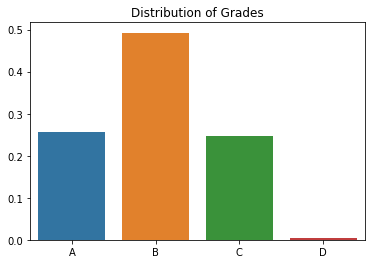

In [28]:
# seaborn
ax = sns.barplot(x=x, y=y)
plt.title('Distribution of Grades')
plt.show()

**ASSIGNMENT: Plot the percent of smokers and non-smokers**

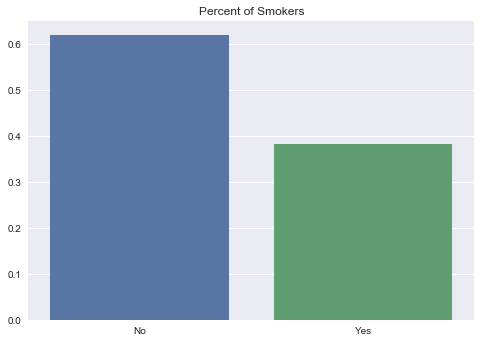

In [177]:
# plot smokers and non-smokers


## Pie Chart

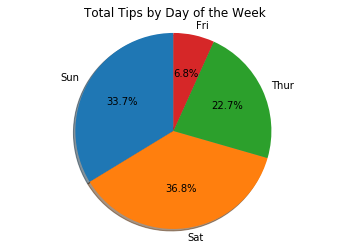

In [10]:
# Calculate what percent of tips for each day
cat = pd.unique(tips['day'])
daytot = []
totaltip = np.sum(tips['total_bill'])

for day in cat:
    subset = tips[tips['day'] == day]
    total = np.sum(subset['total_bill'])
    daytot.append(total / totaltip)
    
fig1, ax1 = plt.subplots()
ax1.pie(daytot, labels=cat, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Total Tips by Day of the Week')
plt.show()

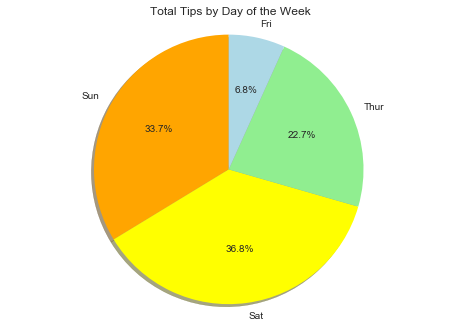

In [11]:
plt.style.use('seaborn') # this is the only line we change

fig1, ax1 = plt.subplots()
ax1.pie(daytot, labels=cat, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['orange','yellow','lightgreen','lightblue'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Total Tips by Day of the Week')
plt.show()

**ASSIGNMENT: Plot the distribution of grades for Williams' Class**

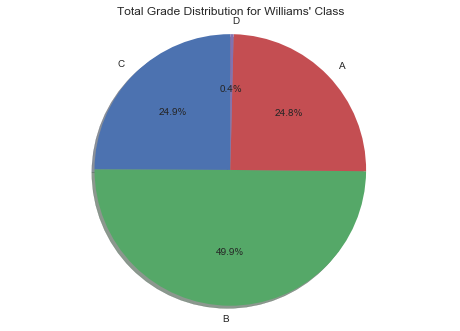

In [187]:
# Calculate the grade distribution

# plot the grade distribution


## T-test

In [143]:
import scipy.stats
alpha = 0.05

Williams_class = df[df['Teacher'] == 'Williams']
Smith_class = df[df['Teacher'] == 'Smith']

Williams_grades = Williams_class['Grades'].values
Smith_grades = Smith_class['Grades'].values

t, p = scipy.stats.ttest_ind(Williams_grades, Smith_grades, equal_var=False)
print('t_statistic is: ', t)
print('p_statistic is: ', p)

# conclusion
if p > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We reject the null hypothesis')

t_statistic is:  -0.5677772204172525
p_statistic is:  0.5702052235265713
We cannot reject the null hypothesis


**ASSIGNMENT: Calculate if there is a significant difference between Smith's and Jones' classes**

t_statistic is:  -0.6720706805304542
p_statistic is:  0.501562100042237
We cannot reject the null hypothesis


## Maximum Likelihood

In [190]:
from scipy.stats import norm
predicted_mean, predicted_stddv = norm.fit(df['Age'].values)
print('The predicted mean is:', predicted_mean)
print('The predicted std dev is:', predicted_stddv)

The predicted mean is: 39.91344313199563
The predicted std dev is: 5.202558576068946


**ASSIGNMENT: Predict the tip distribution**

The predicted mean is: 19.78594262295082
The predicted std dev is: 8.884150577771132


**ASSIGNMENT: Now plot the histogram of tips and the predicted curve**

**Why doesn't this fit well?**

### **Homework: Create additional tests/graphs here:**
1. First, create your own simulated data that fits a medical/health/biological dataset (or find a biological dataset online).  
2. Create at least 2 types of graphs not mentioned here (e.g. Line graph, heatmap)
3. Create 2 types of statistical tests not mentioned here (e.g. Chi-square, ANOVA)  